Epoch 1/10, Train Loss: 2.3023, Test Loss: 2.2824
Epoch 2/10, Train Loss: 2.3016, Test Loss: 2.2795
Epoch 3/10, Train Loss: 2.3013, Test Loss: 2.2729
Epoch 4/10, Train Loss: 2.3011, Test Loss: 2.3124
Epoch 5/10, Train Loss: 2.3003, Test Loss: 2.3098
Epoch 6/10, Train Loss: 2.2988, Test Loss: 2.4274
Epoch 7/10, Train Loss: 2.2967, Test Loss: 2.4149
Epoch 8/10, Train Loss: 2.2935, Test Loss: 2.4645
Epoch 9/10, Train Loss: 2.2888, Test Loss: 2.8238
Epoch 10/10, Train Loss: 2.2820, Test Loss: 3.6520


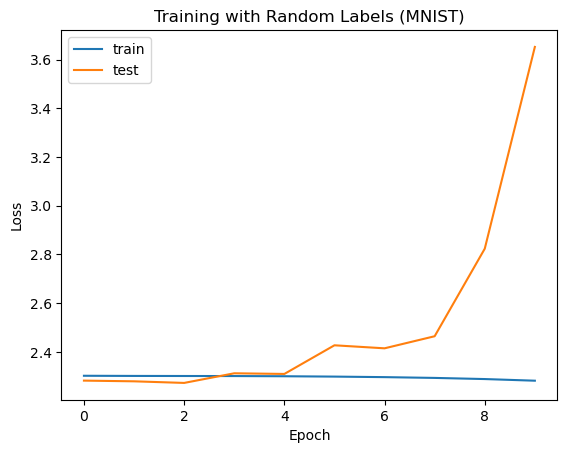

In [ ]:


import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt


class RandomLabelDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
        self.data = dataset.data
        self.targets = dataset.targets.clone()

        
        shuffled_targets = self.targets[torch.randperm(len(self.targets))]
        self.targets = shuffled_targets

    def __getitem__(self, index):
        img, _ = self.data[index], self.targets[index]

        
        img = img.float() / 255.0   
        img = img.unsqueeze(0)      

        label = self.targets[index]
        return img, label

    def __len__(self):
        return len(self.targets)


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_data  = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)


train_random = RandomLabelDataset(train_data)

train_loader = DataLoader(train_random, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=128, shuffle=False)


class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )
    def forward(self, x):
        return self.fc(x)

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


train_losses, test_losses = [], []
epochs = 10  
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_losses.append(running_loss / len(train_loader))

    
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
    test_losses.append(test_loss / len(test_loader))

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")


plt.plot(train_losses, label="train")
plt.plot(test_losses, label="test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training with Random Labels (MNIST)")
plt.legend()
plt.show()


Training hidden_size=10
Training hidden_size=50
Training hidden_size=100
Training hidden_size=200
Training hidden_size=400
Training hidden_size=600
Training hidden_size=800
Training hidden_size=1000
Training hidden_size=1500
Training hidden_size=2000
Training hidden_size=2500
Training hidden_size=3000


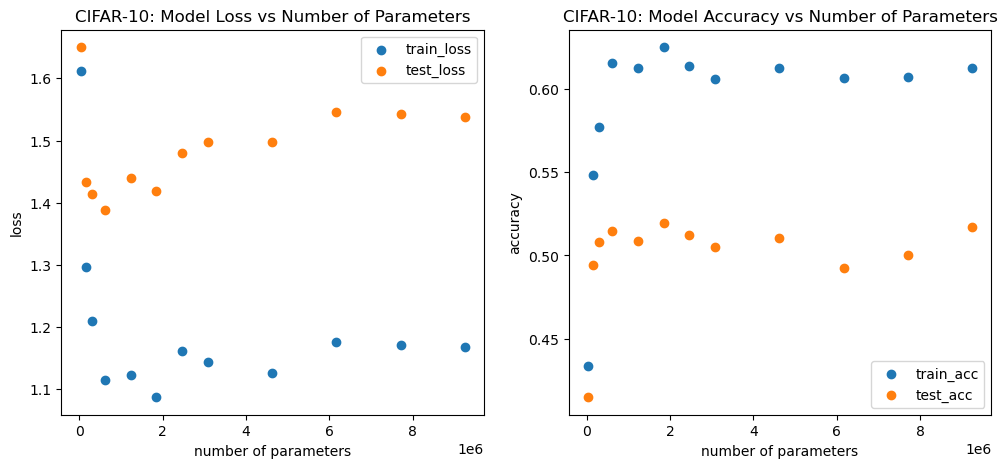

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset  = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(trainset, batch_size=128, shuffle=True)
test_loader  = DataLoader(testset, batch_size=128, shuffle=False)


class SimpleMLP(nn.Module):
    def __init__(self, hidden_size):
        super(SimpleMLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3*32*32, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        return self.fc2(x)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def train_and_eval(hidden_size, epochs=5):
    model = SimpleMLP(hidden_size).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    
    for epoch in range(epochs):
        model.train()
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    
    model.eval()
    train_loss, train_correct, train_total = 0, 0, 0
    test_loss, test_correct, test_total = 0, 0, 0

    with torch.no_grad():
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            train_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            train_correct += predicted.eq(targets).sum().item()
            train_total += targets.size(0)

        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            test_correct += predicted.eq(targets).sum().item()
            test_total += targets.size(0)

    return {
        "params": count_parameters(model),
        "train_loss": train_loss / train_total,
        "test_loss": test_loss / test_total,
        "train_acc": train_correct / train_total,
        "test_acc": test_correct / test_total
    }


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

hidden_sizes = [10, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 2500, 3000]
results = []

for h in hidden_sizes:
    print(f"Training hidden_size={h}")
    res = train_and_eval(h)
    results.append(res)


params = [r["params"] for r in results]
train_loss = [r["train_loss"] for r in results]
test_loss  = [r["test_loss"] for r in results]
train_acc  = [r["train_acc"] for r in results]
test_acc   = [r["test_acc"] for r in results]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(params, train_loss, label="train_loss")
plt.scatter(params, test_loss, label="test_loss")
plt.xlabel("number of parameters")
plt.ylabel("loss")
plt.title("CIFAR-10: Model Loss vs Number of Parameters")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(params, train_acc, label="train_acc")
plt.scatter(params, test_acc, label="test_acc")
plt.xlabel("number of parameters")
plt.ylabel("accuracy")
plt.title("CIFAR-10: Model Accuracy vs Number of Parameters")
plt.legend()

plt.show()


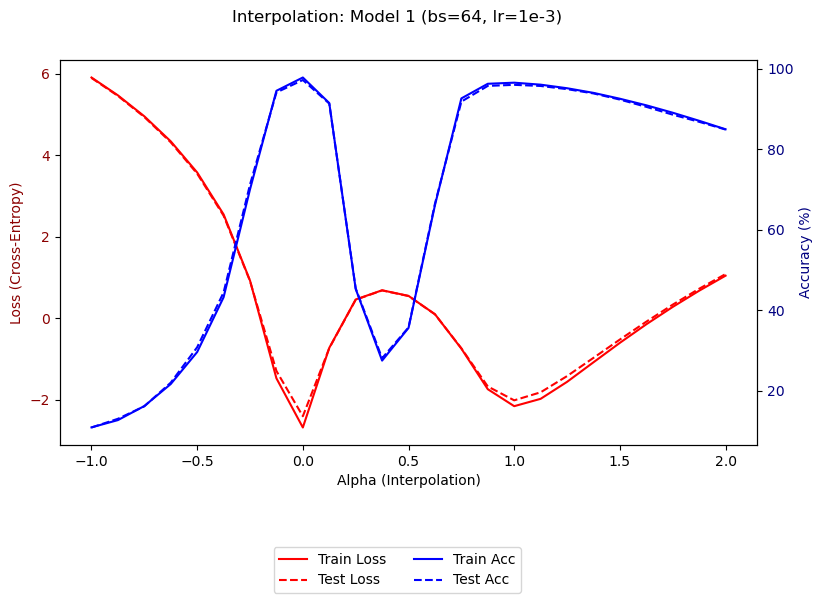

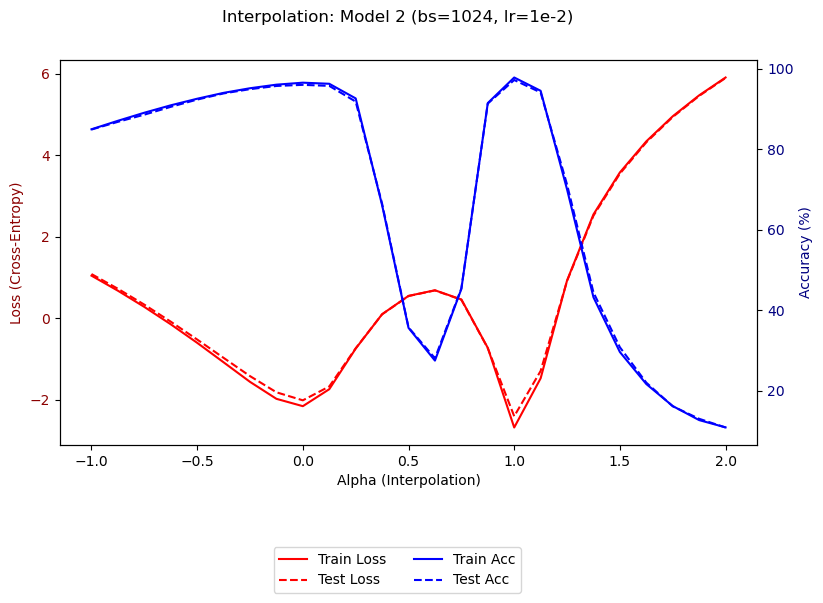

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_set  = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)


class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)


def fit_epoch(model, loader, optimizer, loss_fn):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for X, y in loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        out = model(X)
        loss = loss_fn(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * y.size(0)
        correct += (out.argmax(1) == y).sum().item()
        total += y.size(0)
    return total_loss/total, correct/total

def evaluate(model, loader, loss_fn):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            out = model(X)
            loss = loss_fn(out, y)
            total_loss += loss.item() * y.size(0)
            correct += (out.argmax(1) == y).sum().item()
            total += y.size(0)
    return total_loss/total, correct/total

def train_model(bs, lr, epochs=5):
    train_loader = DataLoader(train_set, batch_size=bs, shuffle=True)
    test_loader  = DataLoader(test_set, batch_size=bs, shuffle=False)
    model = SimpleMLP().to(device)
    opt = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    for _ in range(epochs):
        fit_epoch(model, train_loader, opt, loss_fn)
    return model, train_loader, test_loader, loss_fn


def interpolate(m1, m2, alpha):
    blended = SimpleMLP()
    s1, s2 = m1.state_dict(), m2.state_dict()
    state = {k: (1-alpha)*s1[k] + alpha*s2[k] for k in s1}
    blended.load_state_dict(state)
    return blended.to(device)

def run_interp_experiment(mA, mB, tr_loader, te_loader, loss_fn, title):
    alphas = np.linspace(-1, 2, 25)
    train_losses, test_losses, train_accs, test_accs = [], [], [], []

    for a in alphas:
        m_interp = interpolate(mA, mB, a)
        tr_loss, tr_acc = evaluate(m_interp, tr_loader, loss_fn)
        te_loss, te_acc = evaluate(m_interp, te_loader, loss_fn)
        train_losses.append(tr_loss)
        test_losses.append(te_loss)
        train_accs.append(tr_acc*100)
        test_accs.append(te_acc*100)

    
    fig, ax1 = plt.subplots(figsize=(9,5))
    ax1.set_xlabel("Alpha (Interpolation)")
    ax1.set_ylabel("Loss (Cross-Entropy)", color="darkred")
    ax1.plot(alphas, np.log(train_losses), "r-", label="Train Loss")
    ax1.plot(alphas, np.log(test_losses), "r--", label="Test Loss")
    ax1.tick_params(axis="y", labelcolor="darkred")

    ax2 = ax1.twinx()
    ax2.set_ylabel("Accuracy (%)", color="navy")
    ax2.plot(alphas, train_accs, "b-", label="Train Acc")
    ax2.plot(alphas, test_accs, "b--", label="Test Acc")
    ax2.tick_params(axis="y", labelcolor="navy")

    fig.suptitle(title)
    fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.08), ncol=2)
    plt.show()


m1, tr64, te64, loss_fn = train_model(bs=64, lr=1e-3, epochs=5)


m2, tr1024, te1024, _ = train_model(bs=1024, lr=1e-2, epochs=5)


run_interp_experiment(m1, m2, tr64, te64, loss_fn, "Interpolation: Model 1 (bs=64, lr=1e-3)")
run_interp_experiment(m2, m1, tr1024, te1024, loss_fn, "Interpolation: Model 2 (bs=1024, lr=1e-2)")



Training MNIST with batch_size=8

Training MNIST with batch_size=16

Training MNIST with batch_size=32

Training MNIST with batch_size=64

Training MNIST with batch_size=128

Training MNIST with batch_size=256

Training MNIST with batch_size=512

Training MNIST with batch_size=1024

Training CIFAR10 with batch_size=8

Training CIFAR10 with batch_size=16

Training CIFAR10 with batch_size=32

Training CIFAR10 with batch_size=64

Training CIFAR10 with batch_size=128

Training CIFAR10 with batch_size=256

Training CIFAR10 with batch_size=512

Training CIFAR10 with batch_size=1024


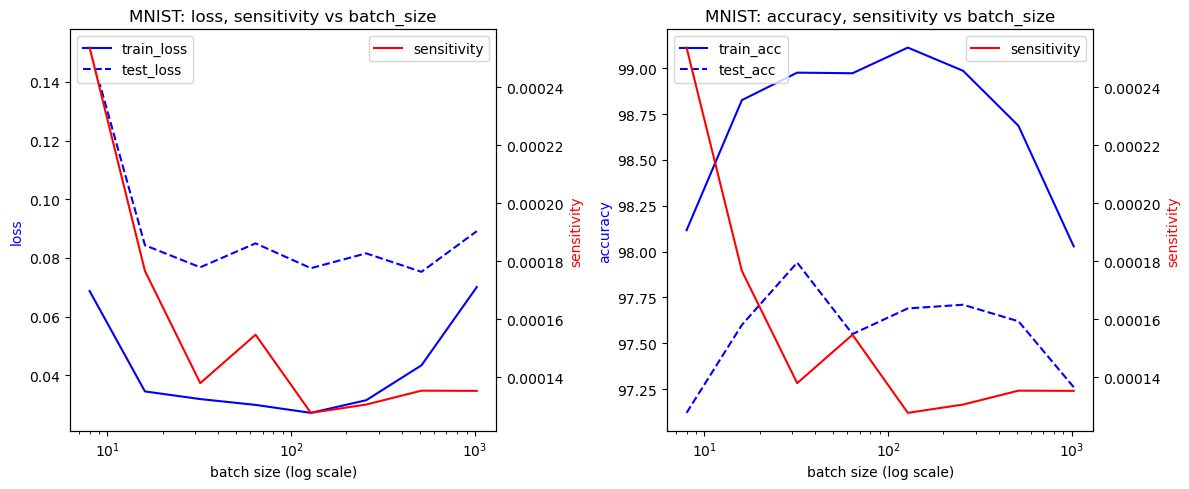

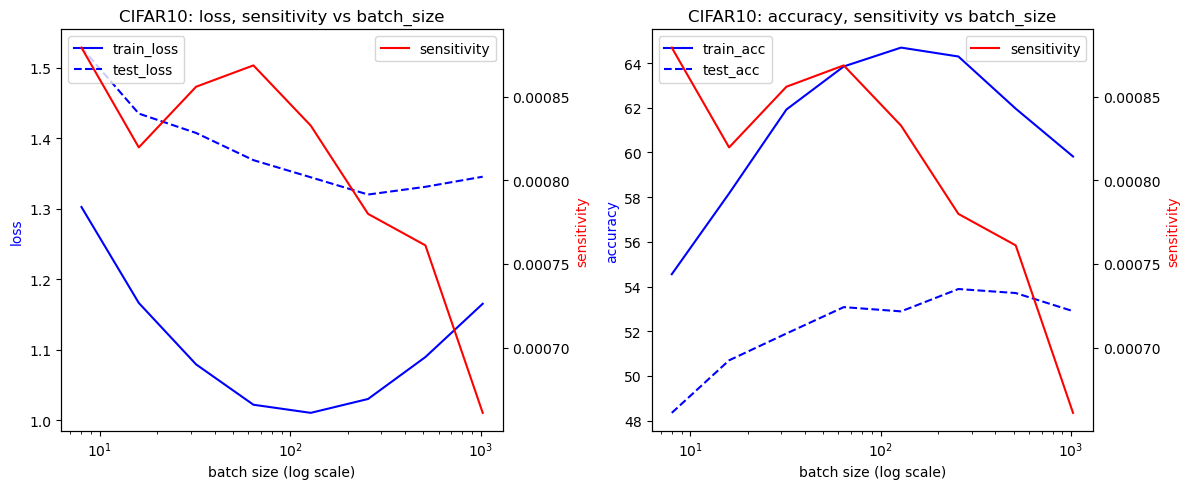

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import math


def get_dataset(name="MNIST"):
    if name.upper() == "MNIST":
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
        train_set = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
        test_set  = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)
        in_dim, num_classes = 28*28, 10
    elif name.upper() == "CIFAR10":
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
        train_set = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
        test_set  = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
        in_dim, num_classes = 32*32*3, 10
    else:
        raise ValueError("Dataset must be MNIST or CIFAR10")
    return train_set, test_set, in_dim, num_classes


class MLP(nn.Module):
    def __init__(self, in_dim, num_classes=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_dim, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

def train_model(train_set, test_set, in_dim, num_classes, batch_size=64, lr=1e-3, epochs=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MLP(in_dim, num_classes).to(device)

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test_loader  = DataLoader(test_set, batch_size=1024, shuffle=False)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            loss = criterion(model(imgs), labels)
            loss.backward()
            optimizer.step()

    return model, train_loader, test_loader, criterion


def evaluate_model(model, loader, criterion):
    device = next(model.parameters()).device
    model.eval()
    total_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * labels.size(0)
            _, pred = outputs.max(1)
            correct += pred.eq(labels).sum().item()
            total += labels.size(0)
    return total_loss / total, correct / total * 100


def compute_sensitivity(model, loader, criterion, num_batches=1):
    device = next(model.parameters()).device
    model.eval()
    norms = []
    for i, (imgs, labels) in enumerate(loader):
        imgs, labels = imgs.to(device), labels.to(device)
        imgs.requires_grad = True
        loss = criterion(model(imgs), labels)
        grads = torch.autograd.grad(loss, imgs, create_graph=False)[0]
        fro_norm = torch.norm(grads.view(grads.size(0), -1), p="fro", dim=1)
        norms.extend(fro_norm.detach().cpu().numpy())
        if i >= num_batches:
            break
    return np.mean(norms)


def run_experiment(dataset_name, batch_sizes, epochs=5):
    train_set, test_set, in_dim, num_classes = get_dataset(dataset_name)

    results = []
    for bs in batch_sizes:
        print(f"\nTraining {dataset_name} with batch_size={bs}")
        model, train_loader, test_loader, criterion = train_model(
            train_set, test_set, in_dim, num_classes,
            batch_size=bs, lr=1e-3, epochs=epochs
        )
        train_loss, train_acc = evaluate_model(model, DataLoader(train_set, batch_size=1024), criterion)
        test_loss, test_acc   = evaluate_model(model, test_loader, criterion)
        sens = compute_sensitivity(model, test_loader, criterion)

        results.append({
            "batch_size": bs,
            "train_loss": train_loss, "test_loss": test_loss,
            "train_acc": train_acc,   "test_acc": test_acc,
            "sensitivity": sens
        })
    return results


def plot_results(results, dataset_name):
    bs = [r["batch_size"] for r in results]
    train_loss = [r["train_loss"] for r in results]
    test_loss = [r["test_loss"] for r in results]
    train_acc  = [r["train_acc"] for r in results]
    test_acc   = [r["test_acc"] for r in results]
    sens       = [r["sensitivity"] for r in results]

    fig, axes = plt.subplots(1, 2, figsize=(12,5))

    
    ax1 = axes[0]
    ax2 = ax1.twinx()
    ax1.plot(bs, train_loss, "b-", label="train_loss")
    ax1.plot(bs, test_loss, "b--", label="test_loss")
    ax2.plot(bs, sens, "r-", label="sensitivity")
    ax1.set_xscale("log")
    ax1.set_xlabel("batch size (log scale)")
    ax1.set_ylabel("loss", color="b")
    ax2.set_ylabel("sensitivity", color="r")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    ax1.set_title(f"{dataset_name}: loss, sensitivity vs batch_size")

   
    ax1 = axes[1]
    ax2 = ax1.twinx()
    ax1.plot(bs, train_acc, "b-", label="train_acc")
    ax1.plot(bs, test_acc, "b--", label="test_acc")
    ax2.plot(bs, sens, "r-", label="sensitivity")
    ax1.set_xscale("log")
    ax1.set_xlabel("batch size (log scale)")
    ax1.set_ylabel("accuracy", color="b")
    ax2.set_ylabel("sensitivity", color="r")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    ax1.set_title(f"{dataset_name}: accuracy, sensitivity vs batch_size")

    plt.tight_layout()
    plt.show()


batch_sizes = [8, 16, 32, 64, 128, 256, 512, 1024]

mnist_results = run_experiment("MNIST", batch_sizes, epochs=5)
cifar_results = run_experiment("CIFAR10", batch_sizes, epochs=5)

plot_results(mnist_results, "MNIST")
plot_results(cifar_results, "CIFAR10")
